# **Credit Card Fraud Detection**

---



# Task-3

### Importing **Libraries**

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

### Import **Data**

In [28]:
# reading the csv file
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Describe Data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1993 non-null   int64  
 1   V1      1993 non-null   float64
 2   V2      1993 non-null   float64
 3   V3      1993 non-null   float64
 4   V4      1993 non-null   float64
 5   V5      1993 non-null   float64
 6   V6      1993 non-null   float64
 7   V7      1993 non-null   float64
 8   V8      1993 non-null   float64
 9   V9      1993 non-null   float64
 10  V10     1993 non-null   float64
 11  V11     1993 non-null   float64
 12  V12     1993 non-null   float64
 13  V13     1993 non-null   float64
 14  V14     1993 non-null   float64
 15  V15     1993 non-null   float64
 16  V16     1993 non-null   float64
 17  V17     1993 non-null   float64
 18  V18     1993 non-null   float64
 19  V19     1993 non-null   float64
 20  V20     1993 non-null   float64
 21  V21     1993 non-null   float64
 22  

In [30]:
# checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [31]:
df=df.dropna()
# checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [32]:
# number of classes present in the dataset
df.Class.value_counts()

0.0    1990
1.0       2
Name: Class, dtype: int64

## Data Visualization

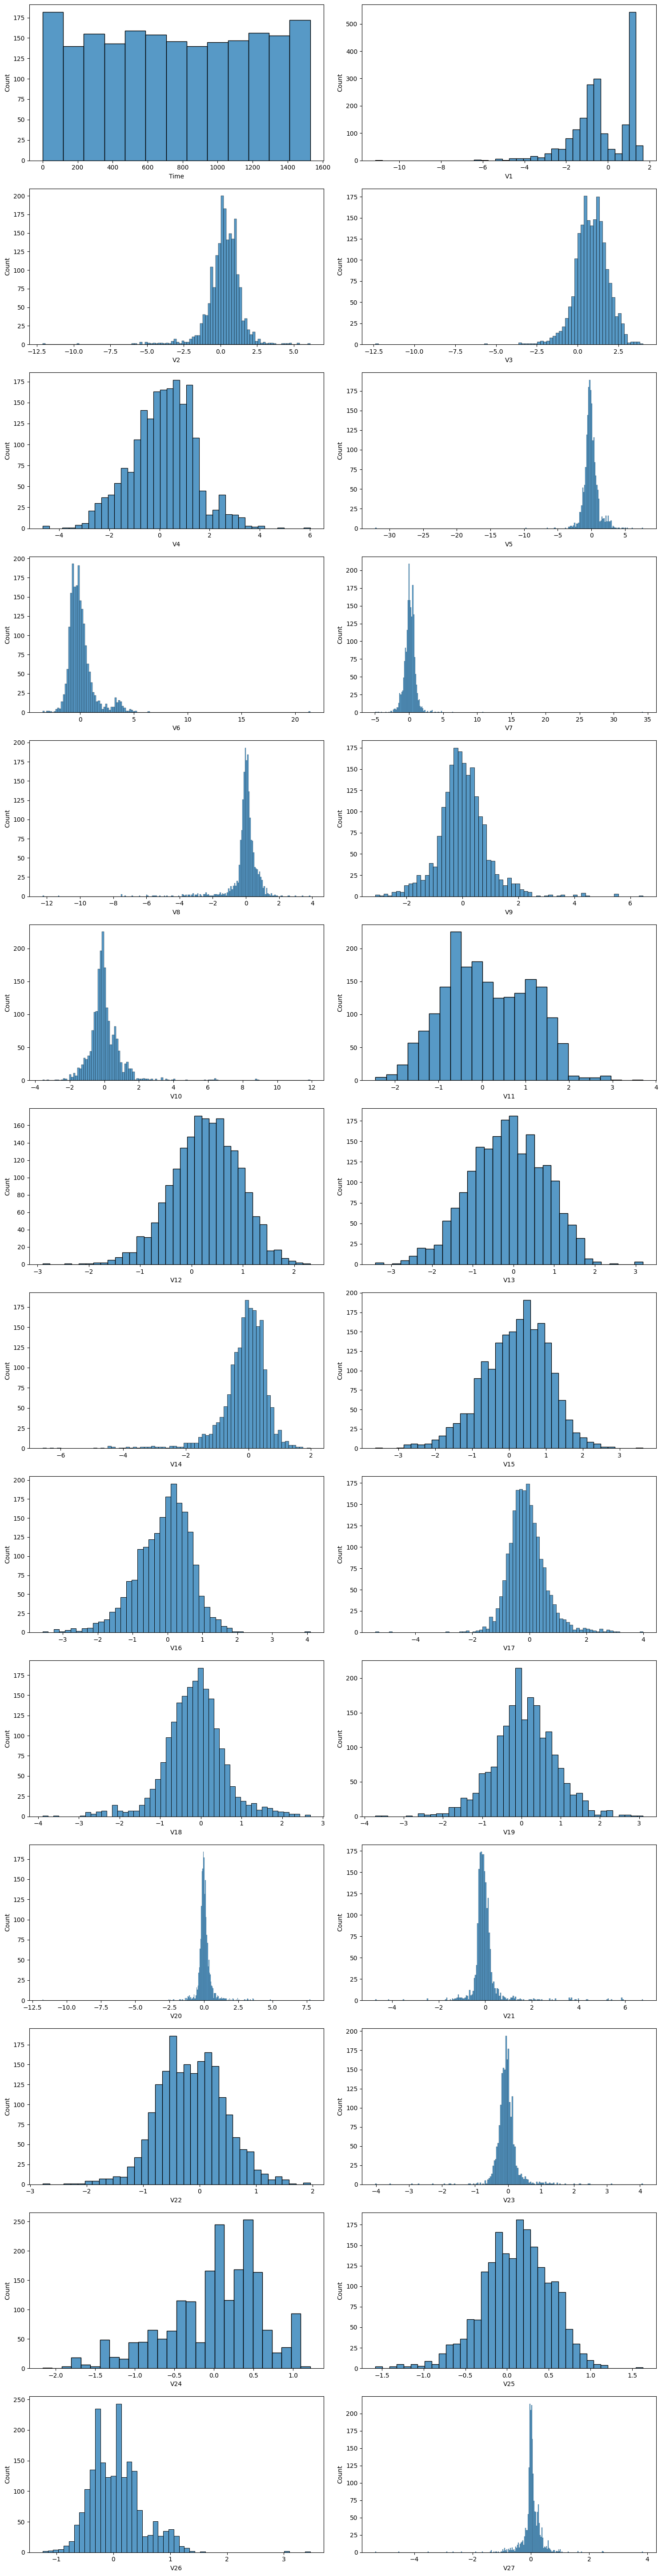

In [33]:
# hist plot
feature_col = df.drop(['Class','Amount'],axis=1).columns
f, ax = plt.subplots(ncols = 2, nrows = 14, figsize=(15,2*len(feature_col)))

for i, c in zip(ax.flatten(), feature_col):
    sns.histplot(df[c], ax = i)
f.tight_layout()

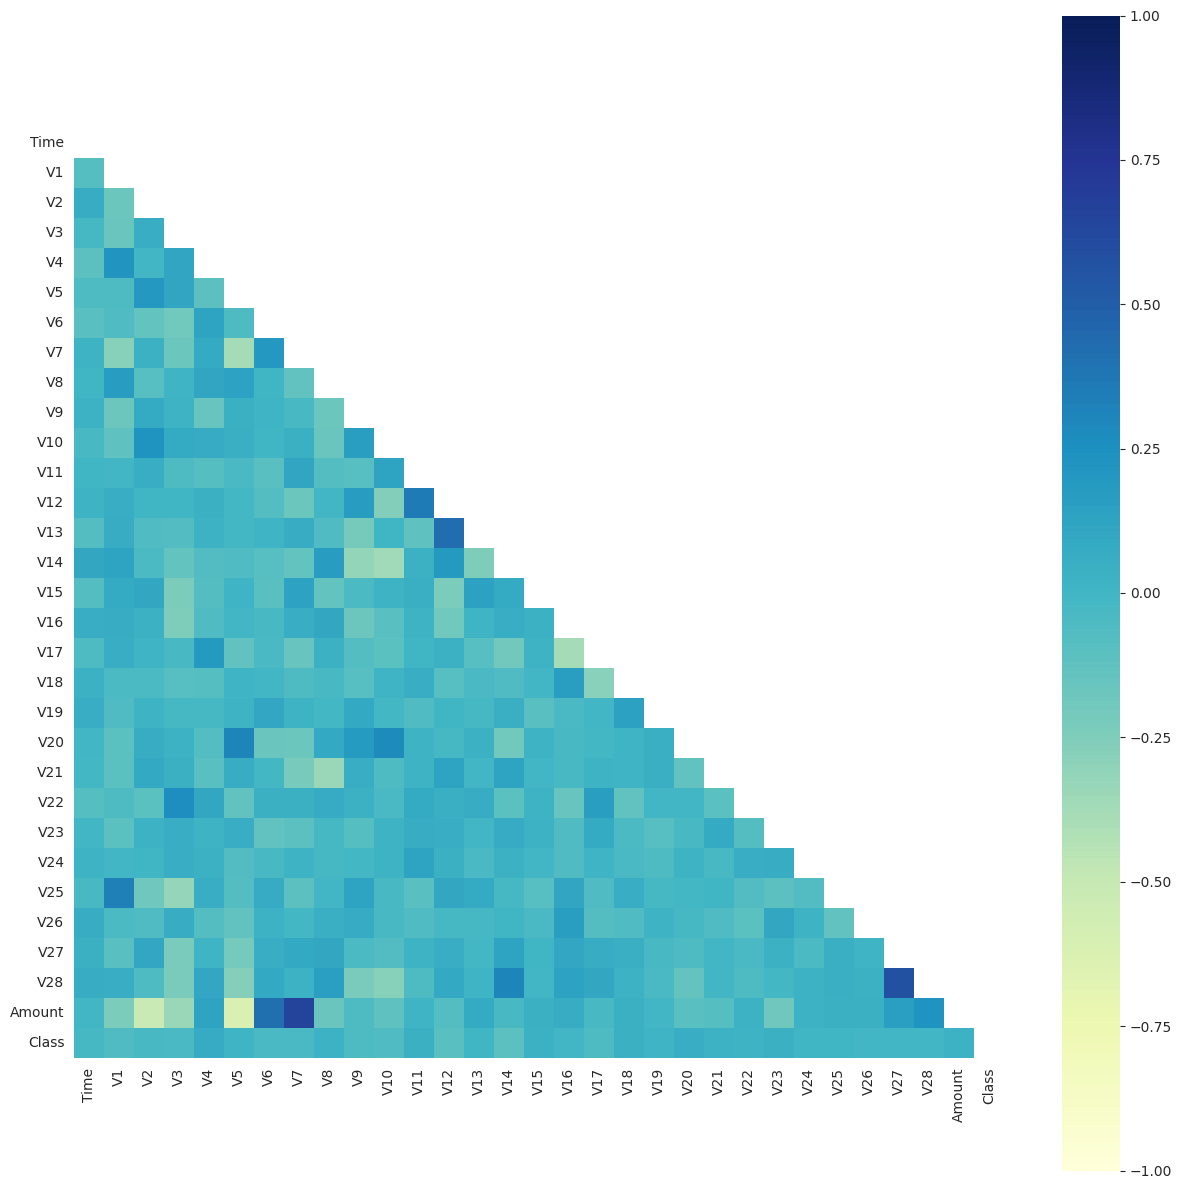

In [34]:
#  heatmap of correlation of columns with one another
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=1,vmin=-1, square=True,cmap="YlGnBu",center=0)

## **Target Variable(y) and Featured Variable(x)**

In [35]:
x = df.drop(['Class'],axis=1)
y = df['Class']

## Data **Preprocessing**

In [36]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [37]:
df = df.dropna(subset=['Class'])


In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Class'] = imputer.fit_transform(df[['Class']])


In [39]:
nan_indices = y.isna().any()
print(nan_indices)


False


## Train Test **Split**

In [40]:
# splitting the dataset into train and test dataset with 4:1 ratio (80%-20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 26,stratify=y)

In [41]:
# Create instance of model
lreg = LogisticRegression()
# Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression()

# Modeling
### Logistic Regression

In [42]:
# Getting prediciton on x_test
y_pred_lreg = lreg.predict(x_test)

In [43]:
# Scoring our model
# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))


# Accuracy of our model
print('--'*50)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,8)
print('Accuracy = ', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[399]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       399

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399

----------------------------------------------------------------------------------------------------
Accuracy =  100.0 %


# **Fradulent or Non-Fradulent**

In [46]:
# Prepare the new transaction data
new_transaction = pd.DataFrame({
    'Time': [56000.0],
    'V1': [-1.234],
    'V2': [0.567],
    'V3': [0.123],
    'V4': [1.456],
    'V5': [-0.789],
    'V6': [-0.321],
    'V7': [2.345],
    'V8': [-0.654],
    'V9': [0.987],
    'V10': [1.234],
    'V11': [-0.567],
    'V12': [0.123],
    'V13': [1.456],
    'V14': [-0.789],
    'V15': [-0.321],
    'V16': [2.345],
    'V17': [-0.654],
    'V18': [0.987],
    'V19': [1.234],
    'V20': [-0.567],
    'V21': [0.123],
    'V22': [1.456],
    'V23': [-0.789],
    'V24': [-0.321],
    'V25': [2.345],
    'V26': [-0.654],
    'V27': [0.987],
    'V28': [1.234],
    'Amount': [100.0]
})

# Apply the same preprocessing steps used on the training data
new_transaction_scaled = scaler.transform(new_transaction)

# Predict the outcome using the logistic regression model
prediction = lreg.predict(new_transaction_scaled)

# Print the predicted outcome
if prediction[0] == 1:
    print("The new transaction is predicted to be fraudulent.")
else:
    print("The new transaction is predicted to be non-fraudulent.")


The new transaction is predicted to be non-fraudulent.
